
### Tasks 

**Challenge 1**

Use the file  ```Data_Marketing_Customer_Analysis_Round3.csv```
- Check if there are highly correlated features and drop them (if there are any).
- One Hot Encoding of the categorical nominal variables, Ordinal Encoding of the categorical ordinal variables.


**Challenge 2**


Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

1. varA
- Use minmax transform to bring varA's values into the range [0,1].
- Check that varA has been rescaled using a displot or a histogram
2. varB
- Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

Hints:

1. Import transformers from the sklearn library
```from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler```
- To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)
- To rescale the column, use the MinMaxScaler transform.
2. Format the column correctly for the transformer.
The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.'''


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df=pd.read_csv(r"C:\Users\agata\Downloads\marketing_customer_analysis_clean.csv")

In [94]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [99]:
df_numerical=df.select_dtypes(include="number")

In [101]:
df_numerical["vehicle_size"].unique()

KeyError: 'vehicle_size'

In [102]:
df_numerical.corr()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


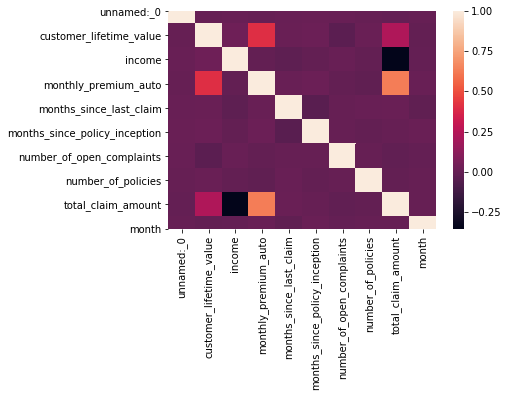

In [103]:
sns.heatmap(df_numerical.corr())

In [104]:
colum=df.columns

In [105]:
list(set(colum)-set(df_numerical.columns))

['state',
 'customer',
 'response',
 'marital_status',
 'effective_to_date',
 'vehicle_type',
 'policy',
 'coverage',
 'renew_offer_type',
 'employmentstatus',
 'gender',
 'location_code',
 'policy_type',
 'education',
 'vehicle_class',
 'sales_channel',
 'vehicle_size']

In [106]:
from sklearn.preprocessing import OneHotEncoder 

In [107]:
df['state'] = df['state'].astype('category')
df['response'] = df['response'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['employmentstatus'] = df['employmentstatus'].astype('category')
df['policy_type'] = df['policy_type'].astype('category')

In [108]:
df['state_new'] = df['state'].cat.codes 
df['response_new'] = df['response'].cat.codes 
df['marital_status_new'] = df['marital_status'].cat.codes
df['employment_status_new'] = df['employmentstatus'].cat.codes
df['policy_type_new'] = df['policy_type'].cat.codes

In [109]:
enc = OneHotEncoder()

In [110]:
enc_data = pd.DataFrame(enc.fit_transform(df[['state_new', 'response_new','marital_status_new', 'employment_status_new','policy_type_new' ]]).toarray()) 

C:\Users\agata\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [111]:
New_df = df.join(enc_data)

In [112]:
New_df.columns

Index([                   'unnamed:_0',                      'customer',
                               'state',       'customer_lifetime_value',
                            'response',                      'coverage',
                           'education',             'effective_to_date',
                    'employmentstatus',                        'gender',
                              'income',                 'location_code',
                      'marital_status',          'monthly_premium_auto',
             'months_since_last_claim', 'months_since_policy_inception',
           'number_of_open_complaints',            'number_of_policies',
                         'policy_type',                        'policy',
                    'renew_offer_type',                 'sales_channel',
                  'total_claim_amount',                 'vehicle_class',
                        'vehicle_size',                  'vehicle_type',
                               'month',            

In [113]:
from sklearn.preprocessing import OrdinalEncoder

In [116]:
orden = OrdinalEncoder()
orden.fit(New_df[["education"]])
orden.transform(New_df[["education"]])

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [115]:
New_df["coverage"].unique()

array([0., 1., 2.])

In [32]:
New_df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,8,9,10,11,12,13,14,15,16,17
0,0,DK49336,Arizona,4809.216960,No,0.0,1.0,2011-02-18,Employed,M,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,KX64629,California,2228.525238,No,0.0,1.0,2011-01-18,Unemployed,F,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,LZ68649,Washington,14947.917300,No,0.0,0.0,2011-02-10,Employed,M,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,XL78013,Oregon,22332.439460,Yes,1.0,1.0,2011-01-11,Employed,M,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,QA50777,Oregon,9025.067525,No,2.0,0.0,2011-01-17,Medical Leave,F,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,2.0,0.0,2011-01-19,Unemployed,F,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10906,10906,KX53892,Oregon,5259.444853,No,0.0,1.0,2011-01-06,Employed,F,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10907,10907,TL39050,Arizona,23893.304100,No,1.0,0.0,2011-02-06,Employed,F,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10908,10908,WA60547,California,11971.977650,No,2.0,1.0,2011-02-13,Employed,F,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#2

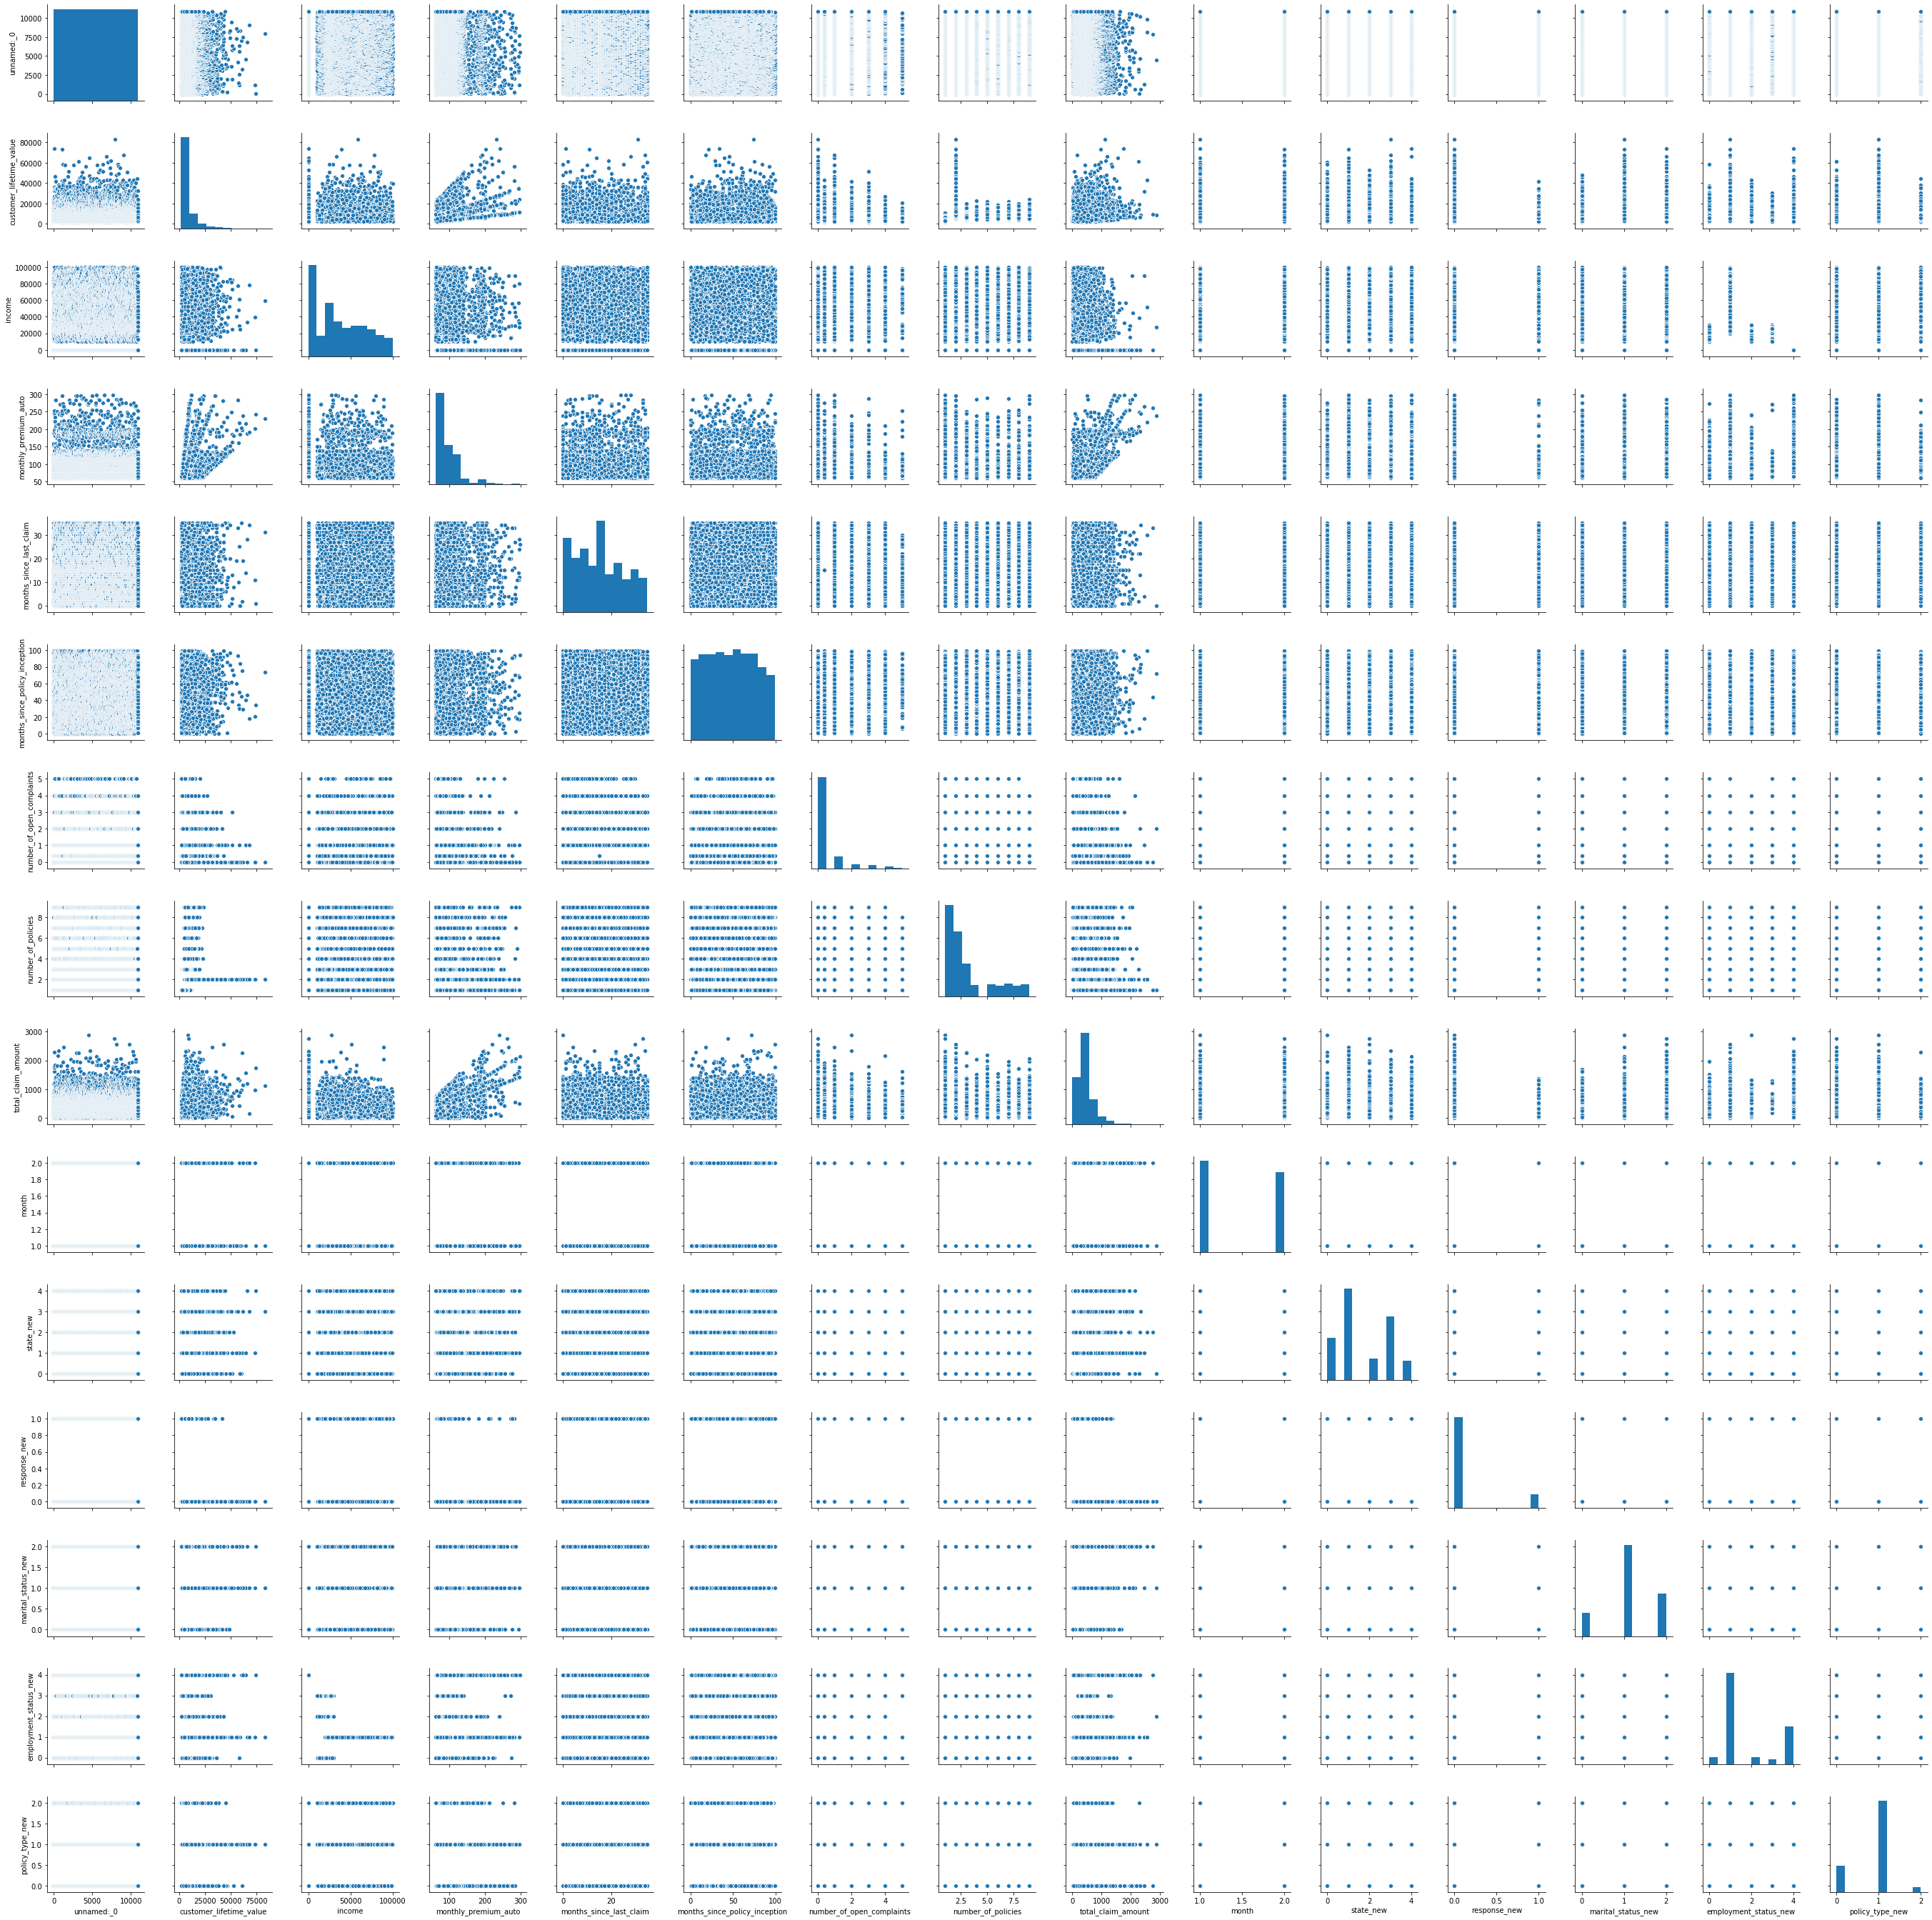

In [34]:

sns.pairplot(df)

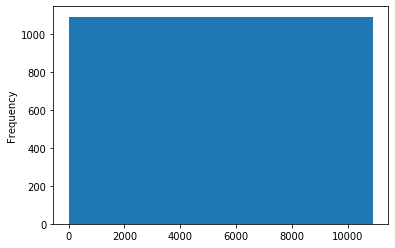

unnamed:_0 None


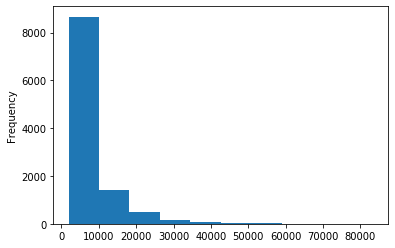

customer_lifetime_value None


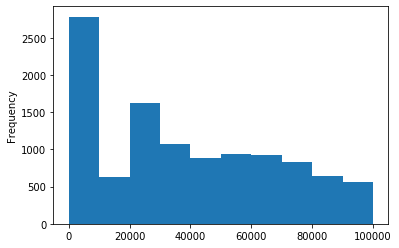

income None


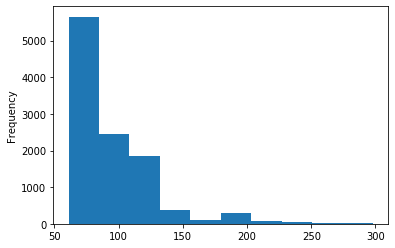

monthly_premium_auto None


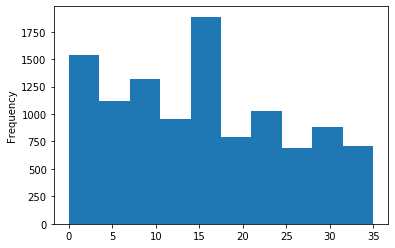

months_since_last_claim None


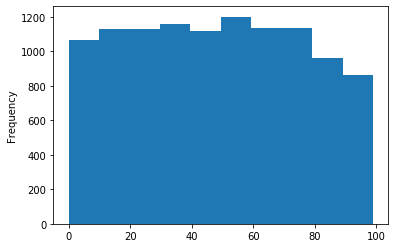

months_since_policy_inception None


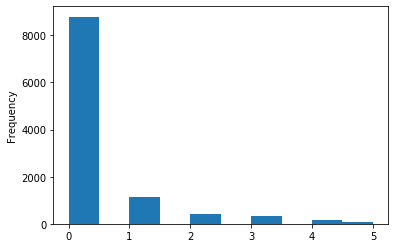

number_of_open_complaints None


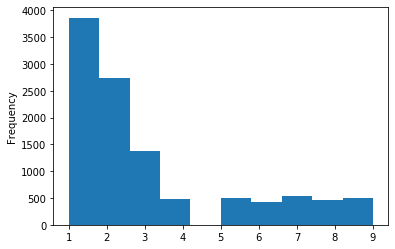

number_of_policies None


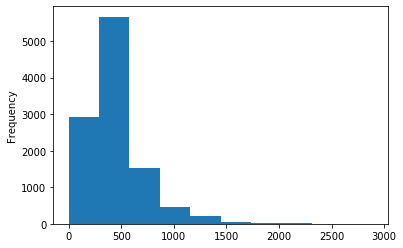

total_claim_amount None


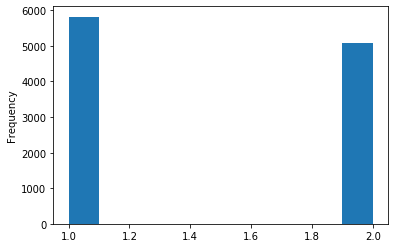

month None


In [46]:
for i in df_numerical:
    df[i].plot(kind="hist")
    print(i, plt.show())

In [53]:
varA=df[["income"]]

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

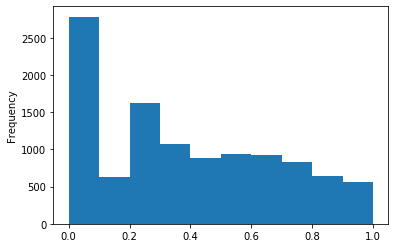

In [59]:
df_scaled = scaler.fit_transform(varA)
New_df[["income"]]=df_scaled
New_df["income"].plot(kind="hist")

In [69]:
varB=df[["monthly_premium_auto"]]

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sscaler = StandardScaler()

In [63]:
auto_scaled=sscaler.fit_transform(varB)

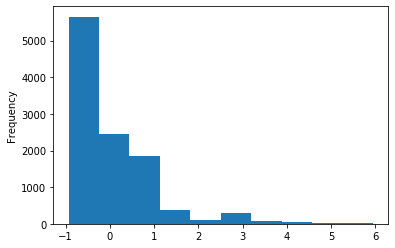

In [64]:
New_df[["monthly_premium_auto"]]=auto_scaled
New_df["monthly_premium_auto"].plot(kind="hist")

In [65]:
from sklearn.preprocessing import PowerTransformer

In [73]:
power=PowerTransformer(method='yeo-johnson', standardize=True)

In [80]:
super_auto_scaled=power.fit_transform(varB)

In [82]:
super_auto_scaled

array([[-1.5423631 ],
       [-1.25689767],
       [ 0.62979166],
       ...,
       [ 1.94287572],
       [ 1.63125326],
       [ 0.65945246]])

In [85]:
import matplotlib.pyplot as plt

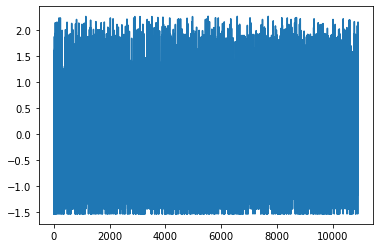

In [86]:
plt.plot(super_auto_scaled)
plt.show()